# Finite difference method vs analytical 1-d Heat equation

In [16]:

showPlots = True
savePlots = False

In [33]:
import numpy as np


def f_dt(dx):
    return (dx**2)/2


L = 1 #rod length
dx = 0.01
nx = int(L/dx) + 1
x = np.linspace(0,L,nx)

T = 0.4 #final time
dt = f_dt(dx)
nt = int(T/dt) + 1
t = np.linspace(0,T,nt)



In [18]:
from pathlib import Path
figpath = Path.cwd().parent.parent / "figures/1dHeat"
figpath.mkdir(parents=True, exist_ok=True)

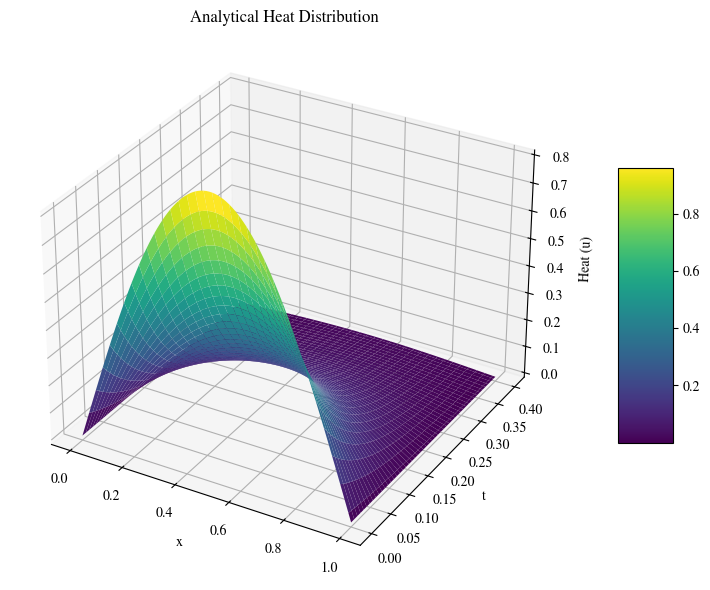

In [34]:
from AnalyticalHeat import analytical_heat
from plotutils import plot_heat


xv, tv = np.meshgrid(x,t)
heat_analytical = analytical_heat(xv,tv)



title= 'Analytical Heat Distribution'

plot_heat(xv=xv, tv=tv, u=heat_analytical, title=title, cmap = "viridis",
    axlims = (None, None, (0, 0.8)),
    showPlots= showPlots,
    savePlots= savePlots,
    figsPath = figpath,
    saveName = "Analytical3D")

In [32]:
from FiniteDiffHeat import MatrixMethod, IterationMethod

#inital heat distribution
u0 = np.sin(np.pi*x)
MM = MatrixMethod(dx,dt,u0,nt)
IM = IterationMethod(dx,dt,u0,nt)
MM.solve()
IM.solve()
Matrix_heat = MM.u
Iter_heat = IM.u
assert np.allclose(Matrix_heat, Iter_heat, atol=0.1)